# CNNs with Tensorflow-Keras

In [1]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import tensorflow as tf


### Load and prepare the MNIST data

In [2]:
(X, y), (Xtest, ytest) = mnist.load_data()
print(X.shape, y.shape)


(60000, 28, 28) (60000,)


In [3]:
Ntrain = 40000
Xtrain = X[:Ntrain]/255.
ytrain = y[:Ntrain]
Xvalid = X[Ntrain:]/255.
yvalid = y[Ntrain:]
Xtest = Xtest/255.


In [4]:
print(Xtrain.shape)


(40000, 28, 28)


In [5]:
Xtrain = Xtrain.reshape(-1, 28, 28, 1)
Xvalid = Xvalid.reshape(-1, 28, 28, 1)
Xtest = Xtest.reshape(-1, 28, 28, 1)

print(Xtrain.shape)


(40000, 28, 28, 1)


In [29]:
ytrainB = keras.utils.to_categorical(ytrain)
yvalidB = keras.utils.to_categorical(yvalid)
ytestB = keras.utils.to_categorical(ytest)


### Create model

In [30]:
lenet5 = models.Sequential()

lenet5.add(layers.Conv2D(6, (5, 5), activation='relu',
                         input_shape=(28, 28, 1), padding="same"))
lenet5.add(layers.AveragePooling2D((2, 2)))
lenet5.add(layers.Conv2D(16, (5, 5), activation='relu'))
lenet5.add(layers.AveragePooling2D((2, 2)))
lenet5.add(layers.Conv2D(120, (1, 1), activation='relu'))
lenet5.add(layers.Flatten())
lenet5.add(layers.Dense(84, activation='relu'))
lenet5.add(layers.Dense(10, activation='softmax'))


In [31]:
lenet5.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_206 (Conv2D)          (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_3 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_207 (Conv2D)          (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_4 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_208 (Conv2D)          (None, 5, 5, 120)         2040      
_________________________________________________________________
flatten_1 (Flatten)          (None, 3000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 84)               

In [32]:
lenet5.compile(optimizer="nadam",
               loss="categorical_crossentropy",
               metrics=["accuracy"])


In [ ]:
tLog = lenet5.fit(Xtrain, ytrainB,
                  epochs=20,
                  batch_size=1024,
                  validation_data=(Xvalid, yvalidB))


In [ ]:
h = tLog.history
plt.plot(h["loss"], label='Loss')
plt.plot(h["accuracy"], label='Accuracy')
plt.plot(h["val_loss"], label='Val Loss')
plt.plot(h["val_accuracy"], label='Val Acurracy')
plt.legend()
plt.show()


In [ ]:
print(h.keys())


# Avancado

In [33]:
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow import image

CNN = InceptionResNetV2(weights='imagenet')


225214464/225209952 [==============================] - 40s 0us/step


(552, 870, 3)
(1, 299, 299, 3)
Predicted: [[('n01882714', 'koala', 0.95617646), ('n01883070', 'wombat', 0.0038037226), ('n03733131', 'maypole', 0.00032393195), ('n02497673', 'Madagascar_cat', 0.00026090187), ('n02500267', 'indri', 0.00022972592)]]


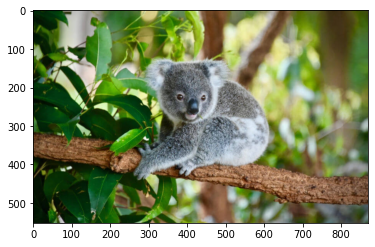

In [66]:
from tensorflow.keras.applications.inception_resnet_v2 import decode_predictions
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
import numpy as np

from urllib.request import urlopen
from PIL import Image

url = 'https://static.biologianet.com/2019/07/coala.jpg'
img = Image.open(urlopen(url))

print(np.array(img).shape)

I = image.resize(img, (299, 299))
# I = np.dstack([np.copy(I)] * 3)
I = np.expand_dims(np.copy(I), axis=0)  # add extra dim.

print(I.shape)

I = preprocess_input(np.copy(I))
preds = CNN.predict(I)
print('Predicted:', decode_predictions(preds, top=5))

plt.imshow(img, cmap="gray")
